In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import metrics
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
datafile = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\MAIN.csv'
df = pd.read_csv(datafile)

In [3]:
# df = df.dropna(how='any') # drop the data that contain nan

In [4]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,9.672870e+05,967269.000000,967287.000000,967287.000000,967269.000000,967287.000000,967287.000000,967287.000000,967287.000000,967287.000000
mean,7.758409e+02,1620.420794,40.737268,-73.982138,1608.750936,40.737125,-73.982350,28917.729181,1978.841311,1.177713
std,7.144814e+03,1454.906830,0.030353,0.018547,1453.416308,0.030117,0.018604,6223.319197,12.205457,0.465508
min,6.100000e+01,72.000000,40.655400,-74.017134,72.000000,40.655400,-74.046305,14529.000000,1886.000000,0.000000
25%,3.090000e+02,383.000000,40.718170,-73.994564,382.000000,40.718170,-73.994618,25940.000000,1969.000000,1.000000
50%,5.040000e+02,508.000000,40.739323,-73.984907,507.000000,40.739126,-73.985180,30817.000000,1981.000000,1.000000
75%,8.490000e+02,3263.000000,40.757148,-73.972826,3263.000000,40.756800,-73.973442,34031.000000,1989.000000,1.000000
max,2.679841e+06,3728.000000,40.863000,-73.884000,3728.000000,40.866000,-73.881000,37889.000000,2003.000000,2.000000


In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [6]:
start_name = df['start station name'].unique()
end_name = df['end station name'].unique()

In [7]:
print(f'The number of unique names of start station is: {len(start_name)}')
print(f'The number of unique names of end station is: {len(end_name)}')
print('Since start stations and end stations are different, we need to plot two seperate plots')

The number of unique names of start station is: 768
The number of unique names of end station is: 774
Since start stations and end stations are different, we need to plot two seperate plots


# Histogram of Duration

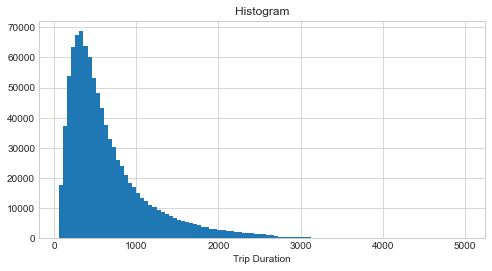

In [8]:
df[df.tripduration<5000].tripduration.hist(bins=100, figsize=(8,4))
plt.xlabel('Trip Duration')
plt.title('Histogram');

# Distance and time

In [9]:
# function for calculating distance
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
def distance(lat1, lon1, lat2, lon2):
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    R = 6373
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

Text(0.5, 1.0, 'Histogram of trip distances in miles')

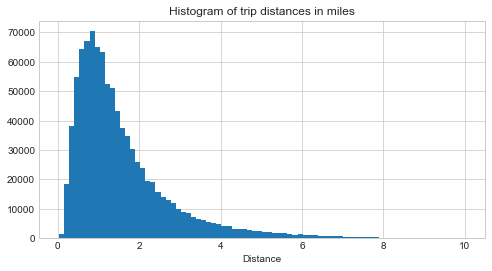

In [10]:
# add a new column for distance calculated
df['distance'] = distance(df['start station latitude'], df['start station longitude'], 
                          df['end station latitude'], df['end station longitude'])
# drop abnormal distance
df = df[df['distance'] <= 10]

# add a new column age
df['age'] = 2019 - df['birth year']

# add a new column age range
df['age range'] = np.where(df['age'] < 20, 'younger than 20', 
                 np.where(df['age'] <= 40, 'between 20 and 40',
                 np.where(df['age'] > 40, 'older than 40', '')))

# add new column - specified gender
df['gender_specified'] = np.where(df['gender'] == 0, 'unknown', 
                 np.where(df['gender'] == 1, 'male',
                 np.where(df['gender'] == 2, 'female', '')))

# drop if distance = 0 but tripduration > 0
df.drop(df[(df['distance'] == 0) & (df['tripduration'] > 0)].index, inplace = True)

# add new column - speed
df['speed'] = df['distance']/ (df['tripduration'] / 60)

#clean format for starttime and endtime:
df['starttime'] = df['starttime'].map(lambda x: x[:-5])
df['stoptime'] = df['stoptime'].map(lambda x: x[:-5])

# histogram of distance without grouping
df.distance.hist(bins=80, figsize=(8,4))
plt.xlabel('Distance')
plt.title('Histogram of trip distances in miles')
#df.distance.describe()

<li>We can see from above histogram that the bike trips are primarily short-distance trips (less than 4 miles). There are few trips longer than 8 miles.
<li>We can get more insights by grouping the trip distances by gender, age, and user type, whose histograms are shown below respectively.

,count,mean,std,min,25%,50%,75%,max
gender_specified,,,,,,,,
female,202972.0,1.625465,1.239518,0.036747,0.800075,1.269538,2.036301,9.982321
male,715900.0,1.581441,1.244931,0.036747,0.759065,1.212864,1.974387,9.999235
unknown,32509.0,1.767977,1.268208,0.036747,0.859425,1.433871,2.338754,9.971869


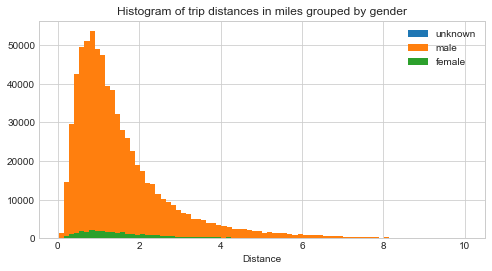

In [11]:
# histogram of distance with grouping of gender
df.groupby('gender_specified').distance.hist(bins=80, figsize=(8,4))
plt.xlabel('Distance')
plt.title('Histogram of trip distances in miles grouped by gender')
plt.legend(['unknown','male','female'])
df.groupby('gender_specified').distance.describe()

<li>We can see from above histogram that Citi bike users are primarily male. 

In [12]:
df.groupby('gender_specified')['distance', 'tripduration'].mean()
# calculate the average speed for different gender groups (mile/minute)
speed = (df.groupby('gender_specified')['distance'].mean())/(df.groupby('gender_specified')['tripduration'].mean()/60)

<ipython-input-12-e61913d4cab9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('gender_specified')['distance', 'tripduration'].mean()


,count,mean,std,min,25%,50%,75%,max
age range,,,,,,,,
between 20 and 40,535931.0,1.596395,1.225953,0.036747,0.783844,1.236473,1.995629,9.999235
older than 40,410047.0,1.600829,1.271080,0.036747,0.757490,1.224947,2.012521,9.984808
younger than 20,5403.0,1.402911,1.120047,0.114639,0.656436,1.069878,1.812137,9.919933


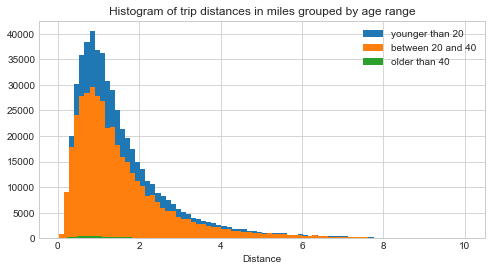

In [13]:
# histogram of distance with grouping of age
df.groupby('age range').distance.hist(bins=80, figsize=(8,4))
plt.xlabel('Distance')
plt.title('Histogram of trip distances in miles grouped by age range')
plt.legend(['younger than 20','between 20 and 40','older than 40'])
df.groupby('age range').distance.describe()

<li>The histogram above shows that users are primarily young and middle-age people. 

Text(0.5, 1.0, 'Uknown')

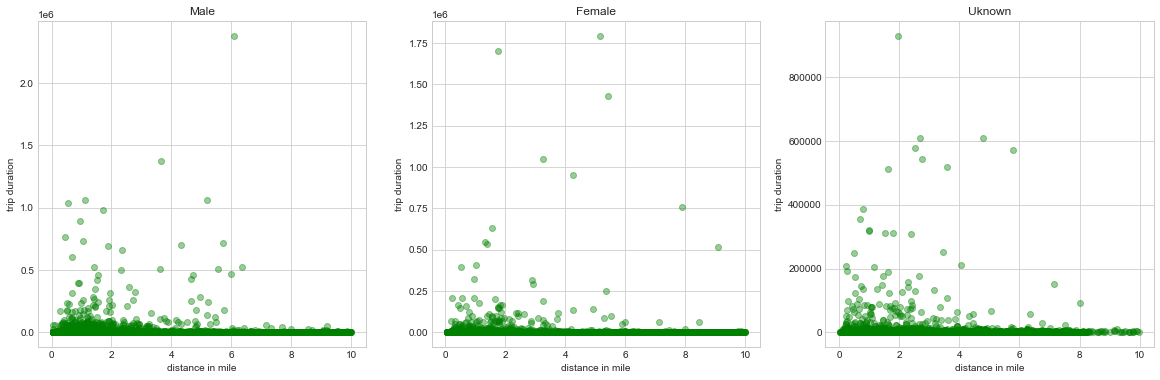

In [14]:
# scatter plot distance - trip duration (grouped by gender)
fig, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].scatter(df[df['gender_specified'] == 'male'].distance, df[df['gender_specified'] == 'male'].tripduration, alpha = 0.4, c = 'g')
axs[0].set_xlabel('distance in mile')
axs[0].set_ylabel('trip duration')
axs[0].set_title('Male')

axs[1].scatter(df[df['gender_specified'] == 'female'].distance, df[df['gender_specified'] == 'female'].tripduration, alpha = 0.4, c = 'g')
axs[1].set_xlabel('distance in mile')
axs[1].set_ylabel('trip duration')
axs[1].set_title('Female')

axs[2].scatter(df[df['gender_specified'] == 'unknown'].distance, df[df['gender_specified'] == 'unknown'].tripduration, alpha = 0.4, c = 'g')
axs[2].set_xlabel('distance in mile')
axs[2].set_ylabel('trip duration')
axs[2].set_title('Uknown')

<li>The scatter plot shows that male users are more likely to ride relatively longer distance than female users. 

Text(0.5, 1.0, 'Older than 40')

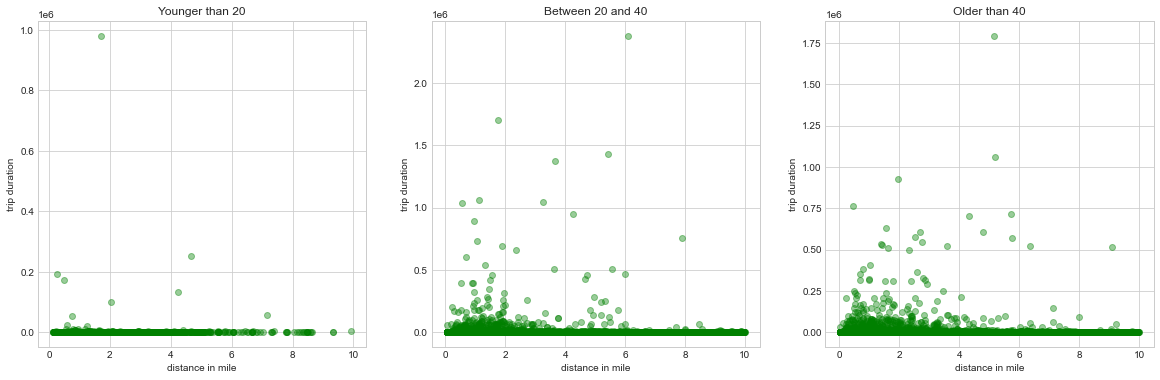

In [15]:
# scatter plot distance - trip duration (grouped by age range)
fig, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].scatter(df[df['age range'] == 'younger than 20'].distance, df[df['age range'] == 'younger than 20'].tripduration, alpha = 0.4, c = 'g')
axs[0].set_xlabel('distance in mile')
axs[0].set_ylabel('trip duration')
axs[0].set_title('Younger than 20')

axs[1].scatter(df[df['age range'] == 'between 20 and 40'].distance, df[df['age range'] == 'between 20 and 40'].tripduration, alpha = 0.4, c = 'g')
axs[1].set_xlabel('distance in mile')
axs[1].set_ylabel('trip duration')
axs[1].set_title('Between 20 and 40')

axs[2].scatter(df[df['age range'] == 'older than 40'].distance, df[df['age range'] == 'older than 40'].tripduration, alpha = 0.4, c = 'g')
axs[2].set_xlabel('distance in mile')
axs[2].set_ylabel('trip duration')
axs[2].set_title('Older than 40')

<li>The scatter plot shows that young users use Citi bikes primarily for short distance ride, while middle and old age people are more likely to ride a relatively longer distance. 

Text(0.5, 1.0, 'Subscriber')

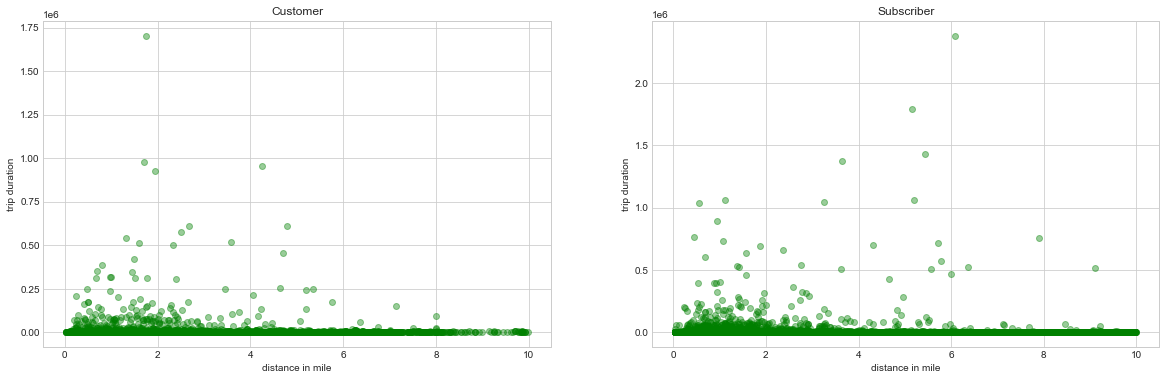

In [16]:
# scatter plot distance - trip duration (grouped by user type)
fig, axs = plt.subplots(1, 2, figsize=(20,6))
axs[0].scatter(df[df['usertype'] == 'Customer'].distance, df[df['usertype'] == 'Customer'].tripduration, alpha = 0.4, c = 'g')
axs[0].set_xlabel('distance in mile')
axs[0].set_ylabel('trip duration')
axs[0].set_title('Customer')

axs[1].scatter(df[df['usertype'] == 'Subscriber'].distance, df[df['usertype'] == 'Subscriber'].tripduration, alpha = 0.4, c = 'g')
axs[1].set_xlabel('distance in mile')
axs[1].set_ylabel('trip duration')
axs[1].set_title('Subscriber')

In [17]:
#df['Start Date'] = pd.to_datetime(df['starttime']).dt.date
# a = df['Start Date']

#dates = pd.to_datetime({"year": a.Year, "month": a.Month, "day": a.Day})

# df["day_of_week"] = pd.to_datetime(d.to_datetime(df['starttime']).dt.date).dt.dayofweek
# #df["day_of_week"] = dates.dt.dayofweek


df['Start Date'] = pd.to_datetime(df['starttime']).dt.date

df['Start Time'] = pd.to_datetime(df['starttime']).dt.time
df['End Date'] = pd.to_datetime(df['stoptime']).dt.date
df['End Time'] = pd.to_datetime(df['stoptime']).dt.time
df['pickup_hour'] = pd.to_datetime(df['starttime']).dt.hour
df['End Hour'] = pd.to_datetime(df['stoptime']).dt.hour

#df['day_of_week'] = df['Start Date'].apply(lambda x: x.weekday()+1) #1-7 representing Mon to Sun
#df['day_of_week'] = df['starttime'].apply(lambda x: x.weekday()+1) #1-7 representing Mon to Sun
# rename weekday, weekend
#df['week'] = np.where(df['day_of_week'] < 6, 'weekday', 'weekend')

In [18]:
df['day_of_week'] = df['Start Date'].apply(lambda x: x.weekday()+1) #1-7 representing Mon to Sun

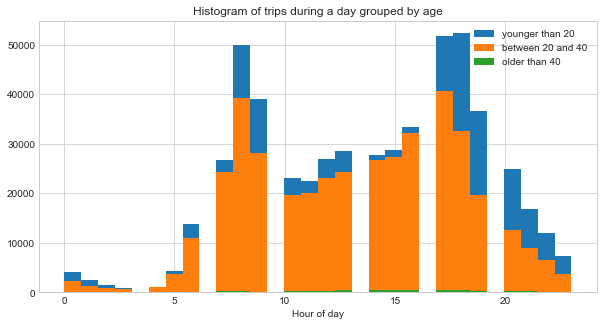

In [19]:
# histogram of number of trips during a day grouped by age
df.groupby('age range').pickup_hour.hist(bins=30, figsize=(10,5))
plt.xlabel('Hour of day')
plt.title('Histogram of trips during a day grouped by age')
plt.legend(['younger than 20', 'between 20 and 40', 'older than 40'])

<li>As the histogram shows above, there are more trips during rush hours (7am-9am and 16pm-19pm) in one day.
<li>We expect to see more people under the age of 20 using citi bike during rush hours since the probability of having a car for them is low.

# Rush hour speed

In [20]:
# filter out rush hour 
df_rush = df[((df['pickup_hour'] <= 9) & (df['pickup_hour'] >= 7)) | 
             ((df['pickup_hour'] <= 19) & (df['pickup_hour'] >= 16))]

Text(0.5, 1.0, 'Older than 40')

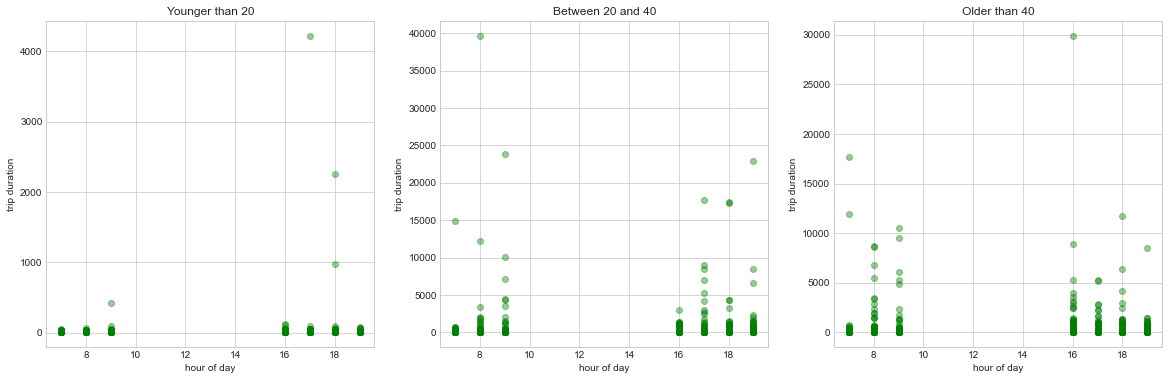

In [21]:
# scatter plot trip duration in a day (grouped by age range)
fig, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].scatter(df_rush[df_rush['age range'] == 'younger than 20'].pickup_hour, 
               (df_rush[df_rush['age range'] == 'younger than 20'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[0].set_xlabel('hour of day')
axs[0].set_ylabel('trip duration')
axs[0].set_title('Younger than 20')

axs[1].scatter(df_rush[df_rush['age range'] == 'between 20 and 40'].pickup_hour, 
               (df_rush[df_rush['age range'] == 'between 20 and 40'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[1].set_xlabel('hour of day')
axs[1].set_ylabel('trip duration')
axs[1].set_title('Between 20 and 40')

axs[2].scatter(df_rush[df_rush['age range'] == 'older than 40'].pickup_hour, 
               (df_rush[df_rush['age range'] == 'older than 40'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[2].set_xlabel('hour of day')
axs[2].set_ylabel('trip duration')
axs[2].set_title('Older than 40')

Text(0.5, 1.0, 'unknown')

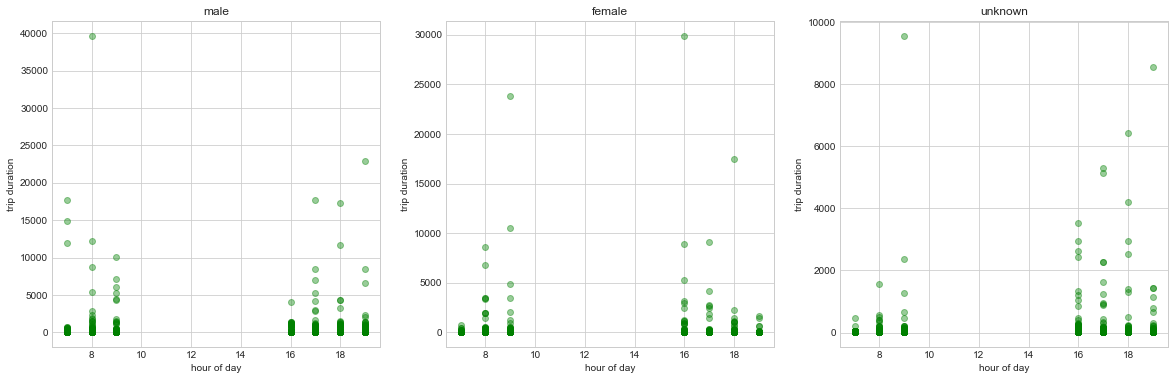

In [22]:
# scatter plot trip duration in one day(grouped by gender)
fig, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].scatter(df_rush[df_rush['gender_specified'] == 'male'].pickup_hour, 
               (df_rush[df_rush['gender_specified'] == 'male'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[0].set_xlabel('hour of day')
axs[0].set_ylabel('trip duration')
axs[0].set_title('male')

axs[1].scatter(df_rush[df_rush['gender_specified'] == 'female'].pickup_hour, 
               (df_rush[df_rush['gender_specified'] == 'female'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[1].set_xlabel('hour of day')
axs[1].set_ylabel('trip duration')
axs[1].set_title('female')

axs[2].scatter(df_rush[df_rush['gender_specified'] == 'unknown'].pickup_hour, 
               (df_rush[df_rush['gender_specified'] == 'unknown'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[2].set_xlabel('hour of day')
axs[2].set_ylabel('trip duration')
axs[2].set_title('unknown')

# Trips by hour on weekdays and weekends

<li>From the below two bar charts about pick-up times on weekday and weekend, we can see that weekday riders mainly use Citi Bikes to commute to and from work, with peak hours from 8–9 AM and 5–6 PM. On the other hand, weekend riders prefer a more leisurely schedule, with most rides occurring in mid afternoon.

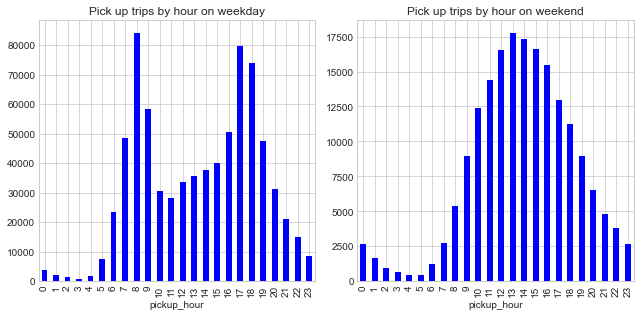

In [23]:
COL_NUM=2
ROW_NUM=1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(9,4.5))

plt.subplot(1,2,1)
df_weekday=df[(df['day_of_week']!=6)&(df['day_of_week']!=7)]
group_weekday = df_weekday.groupby('pickup_hour')
group_weekday.size().plot(kind='bar',title="Pick up trips by hour on weekday",color='b')

plt.subplot(1,2,2)
df_weekend=df[(df['day_of_week']==6)|(df['day_of_week']==7)]
group_weekend = df_weekend.groupby('pickup_hour')
group_weekend.size().plot(kind='bar',title="Pick up trips by hour on weekend",color='b')

plt.tight_layout() 

In [24]:
df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

From the below graph, we can conclude anual subscribers mainly use Citi Bikes to commute to and from work, with peak hours from 8–9 AM and 5–6 PM. And on weekend, they mainly use it for entertainment, with peak in mid afternoon.

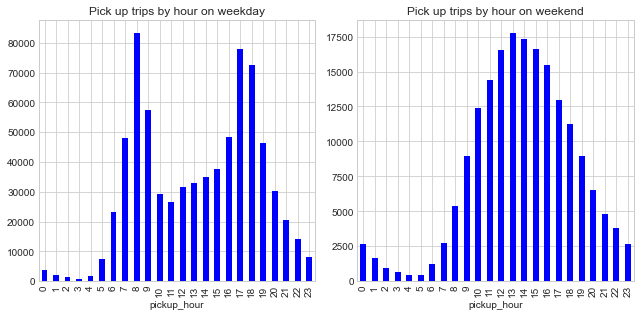

In [25]:
# Redefine the user scope.
df_subscriber=df[df['usertype']=='Subscriber']

# Plot subplots on weekdays and weekend.
COL_NUM=2
ROW_NUM=1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(9,4.5))

plt.subplot(1,2,1)
df_weekday=df_subscriber[(df_subscriber['day_of_week']!=6)&(df_subscriber['day_of_week']!=7)]
group_weekday = df_weekday.groupby('pickup_hour')
group_weekday.size().plot(kind='bar',title="Pick up trips by hour on weekday",color='b')

plt.subplot(1,2,2)
df_weekend=df[(df['day_of_week']==6)|(df['day_of_week']==7)]
group_weekend = df_weekend.groupby('pickup_hour')
group_weekend.size().plot(kind='bar',title="Pick up trips by hour on weekend",color='b')

plt.tight_layout() 

From the below graph, we can conclude day-pass customers primarily use Citi Bikes in the mid afternoons no matter on weekday or weekend. It's because that those riders are mainly tourists, thus prefering a more leisurely schedule.

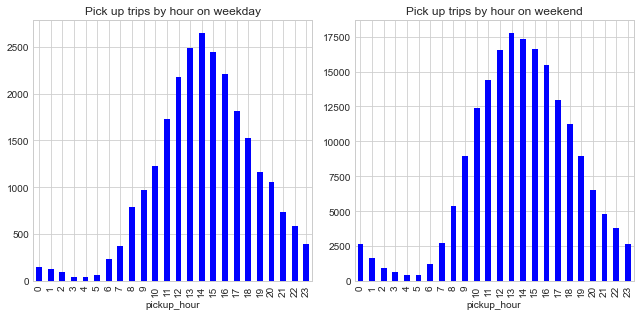

In [26]:
df_customer=df[df['usertype']=='Customer']

COL_NUM=2
ROW_NUM=1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(9,4.5))

plt.subplot(1,2,1)
df_weekday=df_customer[(df_customer['day_of_week']!=6)&(df_customer['day_of_week']!=7)]
group_weekday = df_weekday.groupby('pickup_hour')
group_weekday.size().plot(kind='bar',title="Pick up trips by hour on weekday",color='b')

plt.subplot(1,2,2)
df_weekend=df[(df['day_of_week']==6)|(df['day_of_week']==7)]
group_weekend = df_weekend.groupby('pickup_hour')
group_weekend.size().plot(kind='bar',title="Pick up trips by hour on weekend",color='b')

plt.tight_layout() 

# Ratios for stations

In [27]:
# bar chart of start station density 
#df.groupby('start station name').size().plot(kind='bar',title="start station density")
# filter out the top 5 start station with highest use density
#df.groupby('start station name').size().sort_values(ascending=False)[0:5]
# filter out the top 5 start station with lowest use density
#df.groupby('start station name').size().sort_values(ascending=True)[0:5]
#df.groupby('start station name')['usertype'='Subscriber'].count()


# df.groupby(['start station name', 'usertype']).size().unstack(fill_value=0)

df.groupby("start station name")["usertype"].value_counts(normalize=True)

start station name            usertype  
1 Ave & E 110 St              Subscriber    0.973958
                              Customer      0.026042
1 Ave & E 16 St               Subscriber    0.986635
                              Customer      0.013365
1 Ave & E 18 St               Subscriber    0.975564
                                              ...   
Wyckoff St & 3 Ave            Customer      0.015798
Wyckoff St & Bond St          Subscriber    0.981982
                              Customer      0.018018
Wythe Ave & Metropolitan Ave  Subscriber    0.954180
                              Customer      0.045820
Name: usertype, Length: 1524, dtype: float64

In [ ]:
# bar chart of end station density 
#df.groupby('end station name').size().plot(kind='bar',title="end station density")
# filter out the top 5 end station with highest use density
df.groupby('end station name').size().sort_values(ascending=False)[0:5]
# filter out the top 5 end station with lowest use density
df.groupby('end station name').size().sort_values(ascending=True)[0:5]

In [ ]:
import folium
import folium.plugins as plugins
import numpy as np
df_weekday=df[(df['day_of_week']!=6)&(df['day_of_week']!=7)]
df1=df_weekday.sample(n=30000)

# prepare latitude and longitude data per trip per hour
data=list()
for i in range(24):
    df_=df1[df1['pickup_hour']==i]
    data.append([[df_.iloc[j]['start station latitude'],df_.iloc[j]['start station longitude']]for j in range(len(df_))])

weight = 1  # default value
for time_entry in data:
    for row in time_entry:
        row.append(weight)


## Finding bicycles that travel long distance and short distance

In [28]:
bike_usage = df.groupby('bikeid')[['distance']].sum()
low_use = bike_usage.sort_values(by=['distance']).index[0:int(len(bike_usage)/20)]  #Top 5 percent bicycles
high_use = bike_usage.sort_values(by=['distance']).index[4*int(len(bike_usage)/20):] #The lowest 5 percent bicycles

## Frequency of stattions

In [29]:
def find_station(bike_use):
    station_usage1 = dict()
    station_usage2 = dict()
    for bike in bike_use:
        df1 = df[df.bikeid==bike].groupby('start station name').count()
        max_freq1 = df[df.bikeid==bike].groupby('start station name').size().max()
        for item in df1[df1['start station id'] == max_freq1].index:
            if item not in station_usage1:
                station_usage1[item] = 1
            else:
                station_usage1[item] += 1
        
        df2 = df[df.bikeid==bike].groupby('end station name').count()
        max_freq2 = df[df.bikeid==bike].groupby('end station name').size().max()
        for item in df2[df2['end station id'] == max_freq2].index:
            if item not in station_usage2:
                station_usage2[item] = 1
            else:
                station_usage2[item] += 1
        for item in station_usage2:
            if item not in station_usage1:
                station_usage1[item] = 1
            else:
                station_usage1[item] += station_usage2[item]
    return station_usage1

## top 5 frequency stations

In [30]:
# h = find_station(high_use)
# l = find_station(low_use)
# print('Stations that highly used bycicles park are: 'sorted(h, key=h.__getitem__,reverse=True)[0:5])
# print('Stations that rarely used bycicles park are: 'sorted(l, key=l.__getitem__,reverse=True)[0:5])

SyntaxError: invalid syntax (<ipython-input-30-01d466f896f0>, line 3)

<AxesSubplot:>

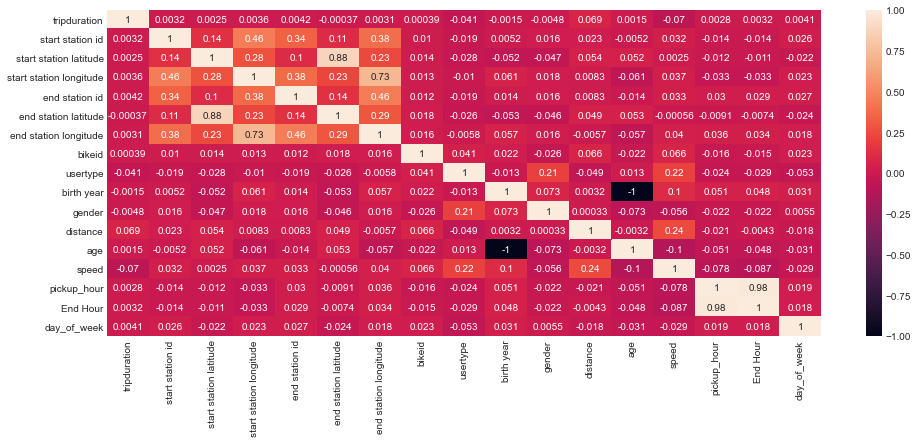

In [33]:
plt.figure(figsize=(16, 6))
sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

In [34]:
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,age range,gender_specified,speed,Start Date,Start Time,End Date,End Time,pickup_hour,End Hour,day_of_week
0,320,2019-01-01 00:01:47,2019-01-01 00:07:07,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,...,older than 40,male,0.200030,2019-01-01,00:01:47,2019-01-01,00:07:07,0,0,2
1,316,2019-01-01 00:04:43,2019-01-01 00:10:00,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,...,older than 40,male,0.109729,2019-01-01,00:04:43,2019-01-01,00:10:00,0,0,2
2,591,2019-01-01 00:06:03,2019-01-01 00:15:55,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,...,between 20 and 40,male,0.206564,2019-01-01,00:06:03,2019-01-01,00:15:55,0,0,2
3,2719,2019-01-01 00:07:03,2019-01-01 00:52:22,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,...,between 20 and 40,male,0.030978,2019-01-01,00:07:03,2019-01-01,00:52:22,0,0,2
4,303,2019-01-01 00:07:35,2019-01-01 00:12:39,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,...,between 20 and 40,male,0.260690,2019-01-01,00:07:35,2019-01-01,00:12:39,0,0,2


In [35]:
for col in df2.columns:
    print(col)

tripduration
starttime
stoptime
start station id
start station name
start station latitude
start station longitude
end station id
end station name
end station latitude
end station longitude
bikeid
usertype
birth year
gender
distance
age
age range
gender_specified
speed
Start Date
Start Time
End Date
End Time
pickup_hour
End Hour
day_of_week


In [36]:
df2=df2.drop(['starttime'], axis = 1)
df2=df2.drop(['stoptime'], axis = 1)
df2=df2.drop(['start station name'], axis = 1)
df2=df2.drop(['end station name'], axis = 1)
df2=df2.drop(['start station id'], axis = 1)
df2=df2.drop(['end station id'], axis = 1)
df2=df2.drop(['bikeid'], axis = 1)
df2=df2.drop(['gender_specified'], axis = 1)
df2=df2.drop(['Start Time'], axis = 1)
df2=df2.drop(['Start Date'], axis = 1)

<AxesSubplot:>

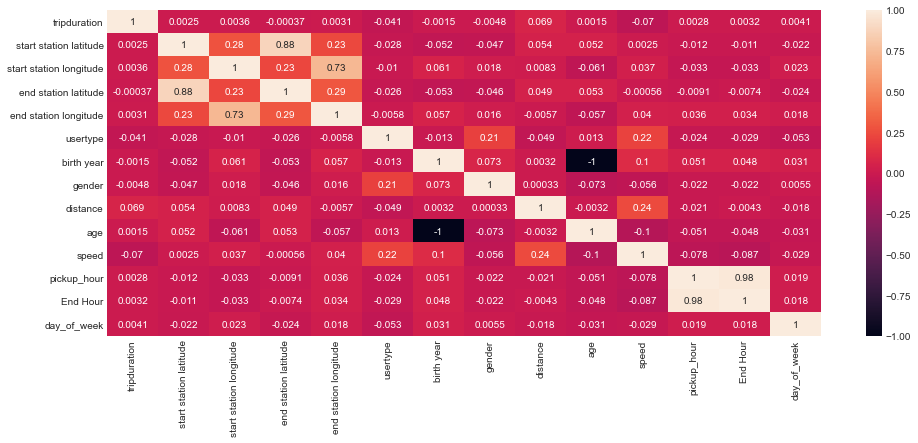

In [37]:
plt.figure(figsize=(16, 6))
sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

# MAINNNNNN

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
regr_file_name = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\REGRESSION.csv'
df = pd.read_csv(regr_file_name)
df2 = df
#df2=df2.drop(['predicted_customer'], axis = 1)
df2.corr()

,usertype,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,gender,distance,age,speed,pickup_hour,day_of_week,cluster_label,start station id
usertype,1.000000,-0.041355,-0.028161,-0.010134,-0.025686,-0.005844,-0.013248,0.209043,-0.048644,0.013248,0.216267,-0.023740,-0.052769,-0.006576,-0.007169
tripduration,-0.041355,1.000000,0.002475,0.003648,-0.000372,0.003052,-0.001515,-0.004773,0.069447,0.001515,-0.069732,0.002770,0.004074,-0.000719,-0.000868
start station latitude,-0.028161,0.002475,1.000000,0.279635,0.875649,0.234554,-0.051570,-0.046655,0.054417,0.051570,0.002544,-0.012373,-0.021837,-0.000090,-0.000287
start station longitude,-0.010134,0.003648,0.279635,1.000000,0.233801,0.733394,0.060951,0.018343,0.008260,-0.060951,0.037264,-0.032516,0.022824,-0.000700,0.001158
end station latitude,-0.025686,-0.000372,0.875649,0.233801,1.000000,0.290360,-0.052542,-0.045688,0.049094,0.052542,-0.000558,-0.009097,-0.024447,-0.000642,-0.000939
end station longitude,-0.005844,0.003052,0.234554,0.733394,0.290360,1.000000,0.057375,0.015822,-0.005736,-0.057375,0.039909,0.036185,0.018043,-0.001070,-0.000270
birth year,-0.013248,-0.001515,-0.051570,0.060951,-0.052542,0.057375,1.000000,0.073439,0.003195,-1.000000,0.102138,0.050798,0.031352,0.000850,0.000203
gender,0.209043,-0.004773,-0.046655,0.018343,-0.045688,0.015822,0.073439,1.000000,0.000335,-0.073439,-0.055946,-0.022465,0.005502,0.000877,0.001476
distance,-0.048644,0.069447,0.054417,0.008260,0.049094,-0.005736,0.003195,0.000335,1.000000,-0.003195,0.242850,-0.021016,-0.017536,-0.001862,-0.001145
age,0.013248,0.001515,0.051570,-0.060951,0.052542,-0.057375,-1.000000,-0.073439,-0.003195,1.000000,-0.102138,-0.050798,-0.031352,-0.000850,-0.000203


<AxesSubplot:>

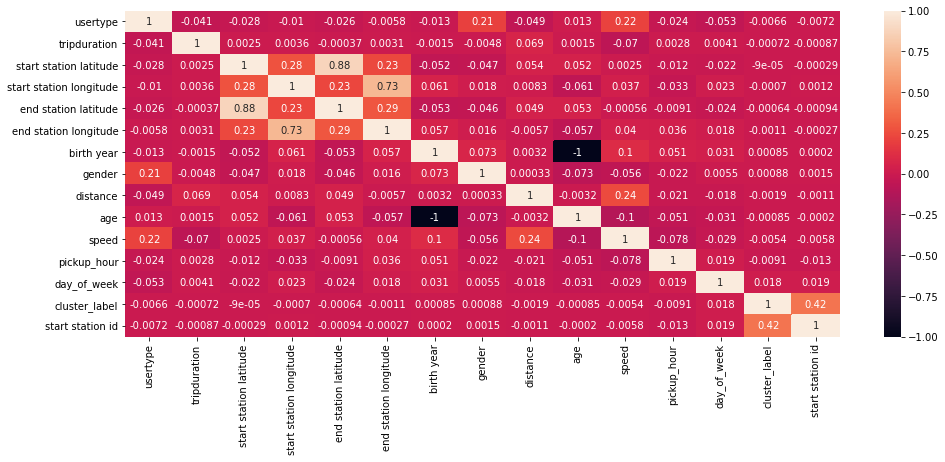

In [3]:
plt.figure(figsize=(16, 6))
sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)


In [4]:
df2=df2.drop(['end station longitude'], axis = 1)
df2=df2.drop(['end station latitude'], axis = 1)
df2=df2.drop(['start station latitude'], axis = 1)
df2=df2.drop(['start station longitude'], axis = 1)
df2=df2.drop(['birth year'], axis = 1)
# df2=df2.drop(['cluster_label'], axis = 1)
# df2=df2.drop(['age'], axis = 1)
# df2=df2.drop(['pickup_hour'], axis = 1)
# df2=df2.drop(['speed'], axis = 1)
df2=df2.drop(['distance'], axis = 1)
df2=df2.drop(['tripduration'], axis = 1)
df2=df2.drop(['start station id'], axis = 1)

<AxesSubplot:>

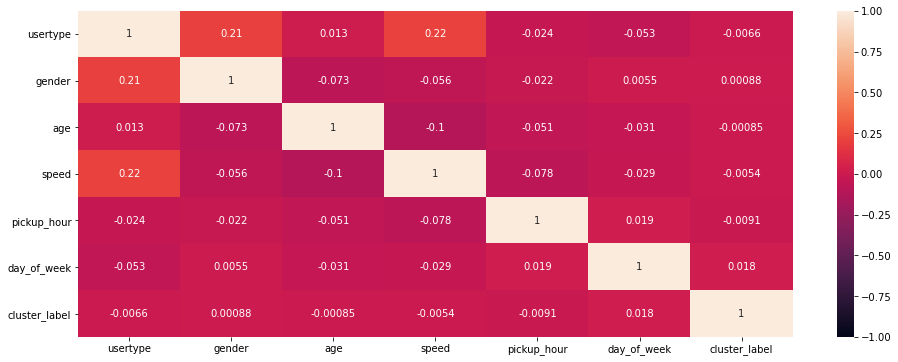

In [5]:
plt.figure(figsize=(16, 6))
sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

In [6]:
# df2=df2[df2['usertype']=='Subscriber']
#df2=df2.drop(['usertype'], axis = 1)
x = df2.iloc[:,1:]  #Independent variable
y = df2['usertype']   #Dependent variable

In [7]:
x.head()

,gender,age,speed,pickup_hour,day_of_week,cluster_label
0,1,48,0.200030,0,2,1
1,1,55,0.109729,0,2,1
2,1,32,0.206564,0,2,1
3,1,29,0.030978,0,2,0
4,1,40,0.260690,0,2,0


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: usertype, dtype: int64

# Logistic Regression

## Training Data

In [47]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.122735
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.261      
Dependent Variable: usertype         AIC:              163486.5109
Date:               2022-11-26 14:59 BIC:              163554.9649
No. Observations:   665966           Log-Likelihood:   -81737.    
Df Model:           5                LL-Null:          -1.1065e+05
Df Residuals:       665960           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender             2.2582   0.0150 150.3136 0.0000  2.2288  2.2877
age                0.0091   0.0005  20.0081 0.0000  0

In [9]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
logit_model=sm.OLS(y_train, x_train)
result=logit_model.fit()
print(result.summary2())

                         Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.955       
Dependent Variable:     usertype         AIC:                         -197362.4708
Date:                   2022-12-03 09:56 BIC:                         -197294.0169
No. Observations:       665966           Log-Likelihood:              98687.      
Df Model:               6                F-statistic:                 2.338e+06   
Df Residuals:           665960           Prob (F-statistic):          0.00        
R-squared (uncentered): 0.955            Scale:                       0.043533    
--------------------------------------------------------------------------------------
                     Coef.      Std.Err.        t         P>|t|      [0.025     0.975]
--------------------------------------------------------------------------------------
gender               0.1879       0.0005     378.1814     0.0000     0.1870     0.1889
age           

## Test Data

In [49]:
yhat = result.predict(x)
prediction = list(map(round, yhat))
predicted_customer = pd.DataFrame(prediction)
# # comparing original and predicted values of y
# # print('A:', list(y_test.values))
# # print('P:', prediction)

In [50]:
final_file = r"D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\1.REGRESSION_RESULT-FINAL.csv"
df['predicted_customer'] = predicted_customer
df.to_csv(final_file)

In [51]:
# a = list(y.values)
# b = list(prediction)
# df = pd.DataFrame({'Actual': a, 'Variance': b})
# variance_file = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\BRO.csv'
# df.to_csv(variance_file)

In [13]:
loc_file = r"D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\LOCATION-FINAL.csv"
df_main = pd.read_csv(loc_file)
df_main_1=df_main
# df_main.describe()

In [14]:
df_main['count']= df_main.groupby('start station id')['start station id'].transform('size')
df_main.head()

,start station id,count
0,307,9
1,514,25
2,445,17
3,388,8
4,438,14


In [15]:
df_main.drop_duplicates(subset='start station id',inplace=True)
print(len(df_main))

204


In [16]:
count_file = r"D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\COUNT-LOCATION.csv"
df_main.to_csv(count_file)

In [17]:
grp_cnt = df_main.groupby(['start station id'])['start station id'].count()
dfx=pd.DataFrame(start_station_id=grp_cnt.index, count=grp_cnt.values,)

TypeError: __init__() got an unexpected keyword argument 'start_station_id'

In [ ]:
dfx.describe()